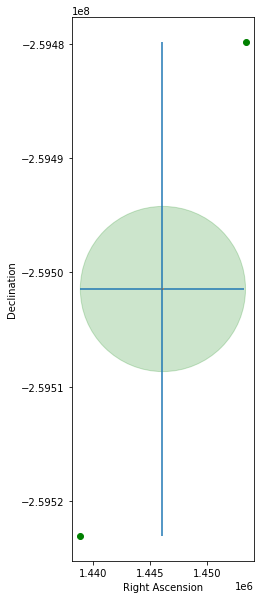

1.44604e+06mas


In [69]:
# write a script to plot the position of a pulsar with error bars at the pulsar epoch, 
# and then the spread of positions it could be at when propagated up to the gaia epoch due to error bars

# input variables: text file of matches output from get_matches, text file of input with pulsar 
# of interest (can be from get_matches), name of pulsar of interest  

# have to convert to mas 

import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time 
import astropy
import astropy.units as u
from astropy.coordinates import Angle
from astropy.visualization import quantity_support

# def plot_propogated_error():

# instantiate all the variables from the input 
ra = '00:24:06.041'
dec = '-72:05:01.480'
ra_err = (.002*u.deg).to(u.mas) # must be floats
dec_err = (.006*u.deg).to(u.mas) # must be floats
pmra = '4'
pmdec = '1'
pmra_err = 2.0 * u.mas/u.yr
pmdec_err = 2.0 * u.mas/u.yr
posepoch = 51600

p_epoch = Time(posepoch, format='mjd').jyear
gaia_epoch = 2015.5 * u.yr
time = gaia_epoch - p_epoch.tolist() * u.yr

# convert ra and dec to an angle that will know to behave as a float in degrees
ra_ang = Angle(ra, u.deg).to(u.mas)
dec_ang = Angle(dec, u.deg).to(u.mas)

# convert pmra and pmdec from mas/yr to deg/yr
pmra_deg = (float(pmra) * u.mas) / u.yr
pmdec_deg = (float(pmdec) * u.mas) / u.yr

# print(ra_ang.unit)
# print(ra_err.unit)
# print(pmra_deg.unit)
# print(pmra_err.unit)
# print(dec_ang.unit)
# print(pmdec_deg.unit)

fig, ax = plt.subplots(figsize=(10,10))

bound1 = (ra_ang + ra_err) + ((pmra_deg + pmra_err)*time)
bound2 = (dec_ang + dec_err) + ((pmdec_deg + pmdec_err)*time)

bound3 = (ra_ang - ra_err) + ((pmra_deg - pmra_err)*time)
bound4 = (dec_ang - dec_err) + ((pmdec_deg - pmdec_err)*time)


bounds = [bound1, bound3, bound2, bound4]

largest_err = 0
for bound in bounds:
    if bound > largest_err:
        largest_err = bound 


new_ra = ra_ang + (pmra_deg*time)
new_dec = dec_ang + (pmdec_deg*time)

x = [ra_ang, (pmra_deg*u.yr)+ra_ang]*u.mas
y = [dec_ang, (pmdec_deg*u.yr)+dec_ang]*u.mas
x_err = [ra_err, pmra_err*u.yr]*u.mas
y_err = [dec_err, pmdec_err*u.yr]*u.mas

x_oth = [bound1, bound3]*u.deg
y_oth = [bound2, bound4]*u.deg

xpos = [ra_ang, new_ra]*u.mas
ypos = [dec_ang, new_dec]*u.mas

region = plt.Circle((new_ra, new_dec), largest_err-new_ra, color='g', alpha=0.2)

with quantity_support():
    ax.set_aspect(1)
    ax.errorbar(x, y, y_err, x_err) 
    ax.plot(x_oth, y_oth, 'go')  
    ax.plot(xpos, ypos)
    ax.add_patch(region)
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    # plt.xlim([ra_ang,largest_err])
    # plt.ylim([dec_ang,largest_err])
    plt.show()

print((pmra_deg*u.yr)+ra_ang)

#shit, we have to convert everything to mas..... aaaaaaaa
